In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [2]:
# Load dataset
housing_data = pd.read_csv("Housing.csv")

In [3]:
# Display the first few rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


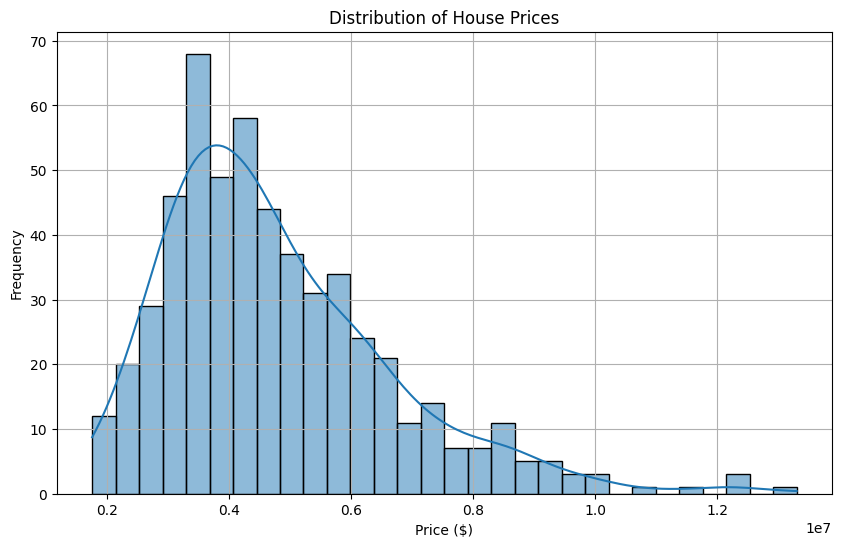

In [4]:
# EDA Section
# Define visualizations and save plots for presentation

# Visualization 1: Distribution of the Outcome Variable (e.g., house prices)

plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

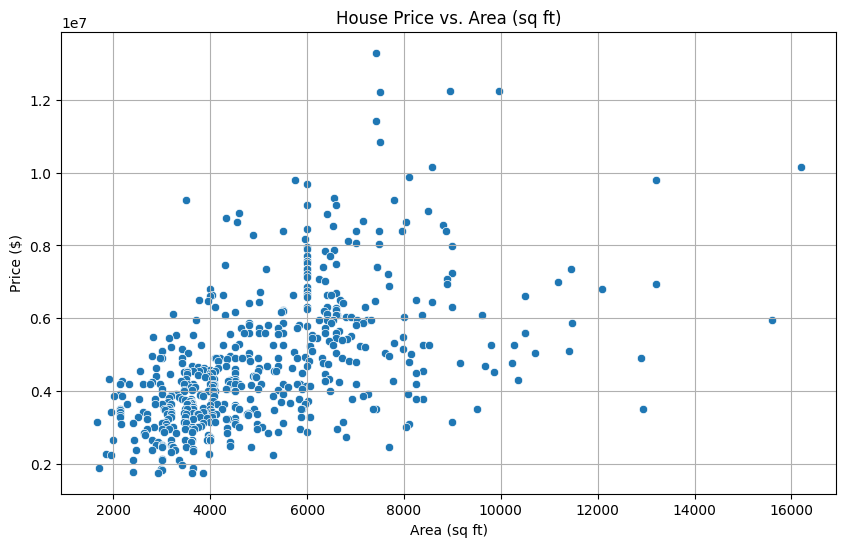

In [5]:
# Visualization 2: Relationship Between Price and Square Footage

plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='area', y='price')
plt.title('House Price vs. Area (sq ft)')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.grid()
plt.show()



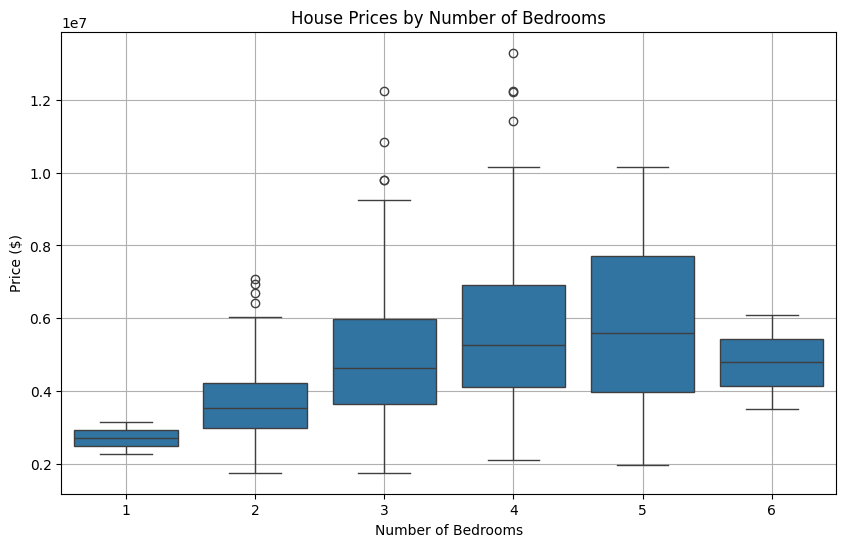

In [8]:
# Visualization 3: Box Plot of Prices by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_data, x='bedrooms', y='price')
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.grid()
plt.show()


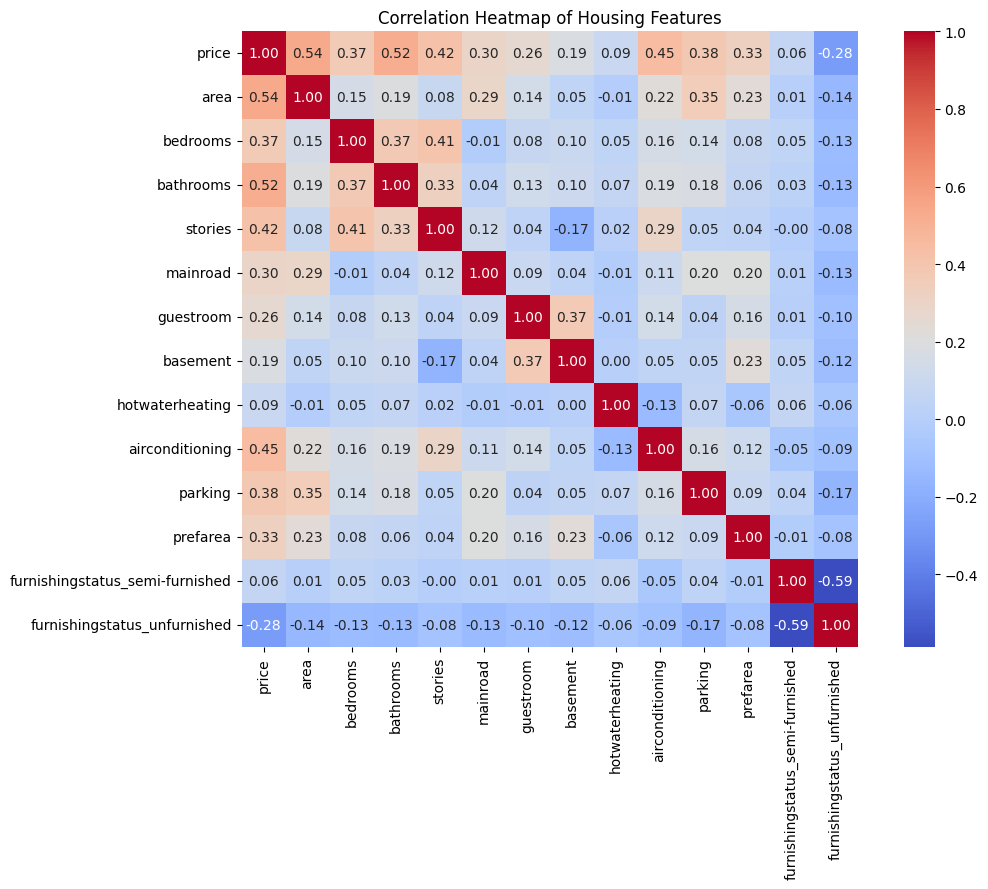

In [7]:
# Visualization 4: Correlation Heatmap
# Convert categorical variables to numeric
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Using label encoding for binary categorical features (yes/no)
for column in categorical_columns:
    housing_data[column] = housing_data[column].map({'yes': 1, 'no': 0}).fillna(housing_data[column])

# For 'furnishingstatus', we can use one-hot encoding since it has more than two categories
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Housing Features')
plt.show()



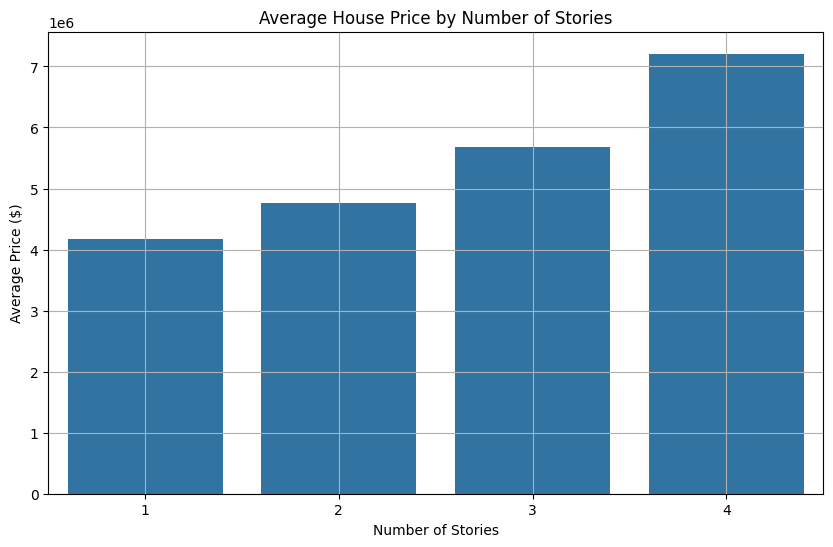

In [6]:
# Visualization 5: Average Price by Number of Stories
plt.figure(figsize=(10, 6))
average_price_by_stories = housing_data.groupby('stories')['price'].mean().reset_index()
sns.barplot(data=average_price_by_stories, x='stories', y='price')
plt.title('Average House Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Average Price ($)')
plt.grid()
plt.show()


In [9]:
# Splitting the dataset into features and target variable
X = housing_data.drop('price', axis=1)  # Features
y = housing_data['price']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [11]:

# Making predictions
predictions = model.predict(X_test)

# Outputting coefficients
coefficients = model.coef_
print("Model Coefficients:", coefficients)


Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
